# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

<ipython-input-1-5b489f4d910b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv('Covid Dataset.csv',index_col='Date Announced',parse_dates=True)

In [3]:
df.head()

,Unnamed: 0,Num Cases,Age Bracket,Gender,Detected State,Current Status,Day,Month,Year
Date Announced,,,,,,,,,
2021-05-05,0,443.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,1,151.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,2,483.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,3,52.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,4,326.0,NaN,NaN,Odisha,Hospitalized,5,5,2021


In [4]:
df.tail()

,Unnamed: 0,Num Cases,Age Bracket,Gender,Detected State,Current Status,Day,Month,Year
Date Announced,,,,,,,,,
2021-08-28,12065,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12066,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12067,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12068,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12069,NaN,NaN,NaN,NaN,NaN,28,8,2021


In [5]:
del df['Unnamed: 0']
del df['Age Bracket']
del df['Gender']
del df['Detected State']
del df['Current Status']
del df['Day']
del df['Month']
del df['Year']

In [6]:
df = df.dropna()
df

,Num Cases
Date Announced,
2021-05-05,443.0
2021-05-05,151.0
2021-05-05,483.0
2021-05-05,52.0
2021-05-05,326.0
...,...
2021-08-28,521.0
2021-08-28,550.0
2021-08-28,13.0


In [7]:
df.tail()

,Num Cases
Date Announced,
2021-08-28,521.0
2021-08-28,550.0
2021-08-28,13.0
2021-08-28,1.0
2021-08-28,6.0


In [8]:
df.isna().sum()

Num Cases    0
dtype: int64

In [9]:
(df['Num Cases'].values < 0).any()

True

In [10]:
df = df[df['Num Cases'] > 0]

In [11]:
df

,Num Cases
Date Announced,
2021-05-05,443.0
2021-05-05,151.0
2021-05-05,483.0
2021-05-05,52.0
2021-05-05,326.0
...,...
2021-08-28,521.0
2021-08-28,550.0
2021-08-28,13.0


In [12]:
(df['Num Cases'].values < 0).any()

False

In [13]:
df.describe()

,Num Cases
count,173963.000000
mean,156.762881
std,584.433606
min,1.000000
25%,2.000000
50%,12.000000
75%,89.000000
max,36030.000000


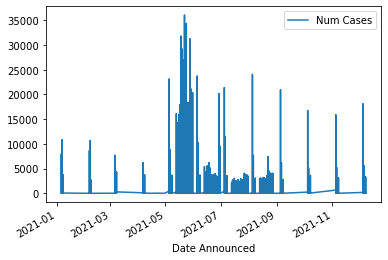

In [14]:
df.plot()

Stationary means mean, variance and covariance is constant over periods.

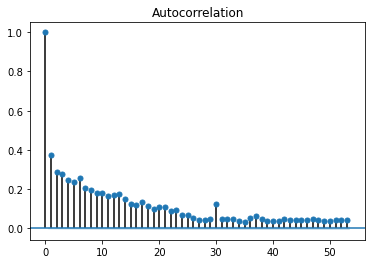

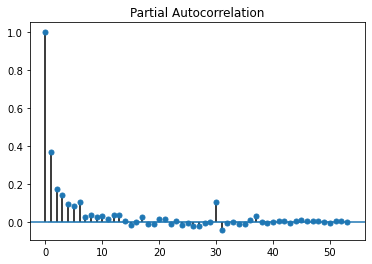

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df);
plot_pacf(df);

In [17]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Num_Cases):
    result=adfuller(Num_Cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(df['Num Cases'])

ADF Test Statistic : -37.11040475113087
p-value : 0.0
#Lags Used : 78
Number of Observations Used : 173884
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


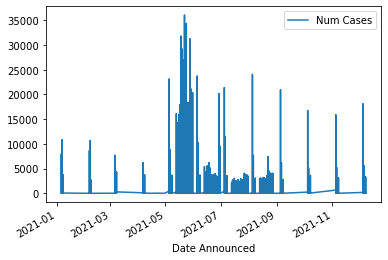

In [16]:
df.plot()

### Converting series to stationary

In [17]:
X = df.values
train = X[0:130472] # 27 data as train data
test = X[130471:]  # 9 data as test data
predictions = []

In [18]:
train.size

130472

# ARIMA model

In [19]:
pip install pmdarima

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [24]:
stepwise_fit = auto_arima(df['Num Cases'], trace = True, supress_warnings = True)
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2673143.236, Time=141.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2749865.364, Time=3.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2713668.738, Time=4.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2675473.956, Time=34.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2749863.364, Time=1.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=154.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2673088.937, Time=98.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2673212.500, Time=63.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2697269.632, Time=6.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2672719.503, Time=145.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2690040.180, Time=7.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=183.97 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=213.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2685050.624, Time=19.18 sec
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               173963
Model:               SARIMAX(3, 1, 1)   Log Likelihood            -1336353.755
Date:                Mon, 03 Jan 2022   AIC                        2672717.510
Time:                        09:24:27   BIC                        2672767.843
Sample:                             0   HQIC                       2672732.415
                             - 173963                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1887      0.001    353.428      0.000       0.188       0.190
ar.L2          0.0521      0.001     81.903      0.000       0.051       0.053
ar.L3          0.0602      0.001     84.657      0.000       0.059       0.062
ma.L1         -0.9289      0.000  -1993.528      0.000      -0.930      -0.928
sigma2      2.754e+05     47.874   5752.092      0.000    2.75e+05    2.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):        4665532337.06
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                            19.35
Prob(H) (two-sided):                  0.00   Kurtosis:                       804.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(3, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2037457.3722795525


In [22]:
predictions= model_arima_fit.forecast(steps=43492)
predictions

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2095: RuntimeWarning: invalid value encountered in multiply
  endog = np.empty((nforecast, self.k_endog)) * np.nan


array([93.72827908, 98.31661355, 78.829689  , ..., 69.88074157,
       69.88074157, 69.88074157])

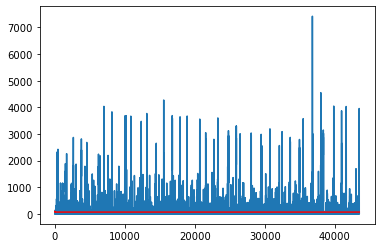

In [23]:
plt.plot(test)
plt.plot(predictions,color='red')

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
mean_squared_error(test,predictions)

75978.88304192126

In [32]:
from math import sqrt
sqrt(mean_squared_error(test,predictions))

275.64267275209994

In [33]:
mean_absolute_error(test,predictions)

102.30058263183427

In [75]:
import numpy as np

In [34]:
r2_score(test,predictions)

-3.412020932280768e-05

In [37]:
model_arima1 = ARIMA(df['Num Cases'],order=(3, 1, 1))
model_arima_fit1 = model_arima1.fit()
print(model_arima_fit1.aic)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

2672717.504460481


In [38]:
index_future_dates = pd.date_range(start='2021-08-28',end='2021-09-27')
pred = model_arima_fit1.predict(start=len(df),end=len(df)+30,type='levels').rename('Arima Predictions')
pred.index=index_future_dates
print(pred)

2021-08-28     819.154849
2021-08-29     971.940314
2021-08-30    1043.289439
2021-08-31    1113.508666
2021-09-01    1139.625143
2021-09-02    1152.480746
2021-09-03    1160.477592
2021-09-04    1164.221109
2021-09-05    1166.114193
2021-09-06    1167.145736
2021-09-07    1167.663327
2021-09-08    1167.928163
2021-09-09    1168.066919
2021-09-10    1168.137914
2021-09-11    1168.174409
2021-09-12    1168.193308
2021-09-13    1168.203030
2021-09-14    1168.208036
2021-09-15    1168.210620
2021-09-16    1168.211951
2021-09-17    1168.212636
2021-09-18    1168.212990
2021-09-19    1168.213172
2021-09-20    1168.213266
2021-09-21    1168.213314
2021-09-22    1168.213339
2021-09-23    1168.213352
2021-09-24    1168.213359
2021-09-25    1168.213362
2021-09-26    1168.213364
2021-09-27    1168.213365
Freq: D, Name: Arima Predictions, dtype: float64


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


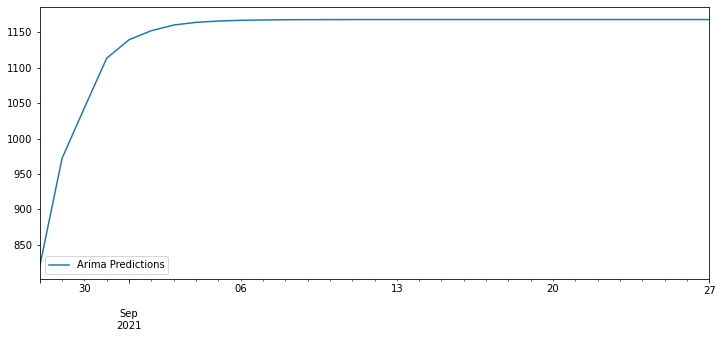

In [39]:
pred.plot(figsize=(12,5),legend=True)